#### link to challenge : https://www.hackerearth.com/challenges/competitive/IIT-Madras-Sangam-ML-Hackathon-2019/problems/

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

### data preparation

In [239]:
train_df = pd.read_csv('./dataset/Train.csv')
test_df = pd.read_csv('./dataset/Test.csv')
sample_df = pd.read_csv('./dataset/sample_submission.csv')

In [39]:
print(train_df.shape, test_df.shape, sample_df.shape)

(33750, 15) (14454, 14) (4, 2)


In [40]:
train_df.head(5)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [41]:
np.unique(train_df.is_holiday)

array(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day',
       'None', 'State Fair', 'Thanksgiving Day', 'Veterans Day',
       'Washingtons Birthday'], dtype=object)

In [42]:
type(train_df.date_time)

pandas.core.series.Series

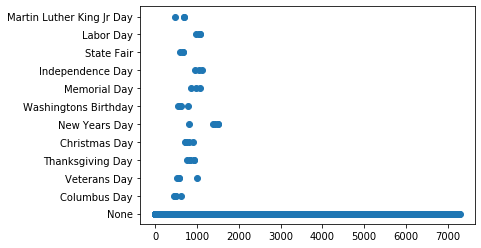

In [43]:
plt.scatter(train_df.traffic_volume, train_df.is_holiday);

In [44]:
target = train_df.traffic_volume

#### drop the label and combine both training and test data to process them

In [45]:
train_df = train_df.drop(['traffic_volume'], axis = 1)

In [46]:
train_df.head(3)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds


In [47]:
train_df.shape

(33750, 14)

In [48]:
combined = train_df.append(test_df)

In [49]:
combined.shape

(48204, 14)

In [50]:
combined.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,154.792839,70.196975,3.446892,202.414426,4.994482,4.994482,281.205870,0.334264,0.000222,49.362231
std,83.635832,18.311794,2.106499,98.515144,2.574889,2.574889,13.338232,44.789133,0.008168,39.015750
min,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,59.000000,2.000000,134.000000,3.000000,3.000000,272.160000,0.000000,0.000000,1.000000
50%,155.000000,72.000000,3.000000,202.000000,5.000000,5.000000,282.450000,0.000000,0.000000,64.000000
75%,227.000000,85.000000,5.000000,290.000000,7.000000,7.000000,291.806000,0.000000,0.000000,90.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,310.070000,9831.300000,0.510000,100.000000


### seperate the categorical and numerical data

In [76]:
numerical = combined.select_dtypes(include=['number'])
categorical = combined.select_dtypes(include=['object'])

In [77]:
numerical.head(5)

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
0,121,89,2,329,1,1,288.28,0.0,0.0,40
1,178,67,3,330,1,1,289.36,0.0,0.0,75
2,113,66,3,329,2,2,289.58,0.0,0.0,90
3,20,66,3,329,5,5,290.13,0.0,0.0,90
4,281,65,3,329,7,7,291.14,0.0,0.0,75


In [78]:
categorical.head(4)

,date_time,is_holiday,weather_type,weather_description
0,2012-10-02 09:00:00,None,Clouds,scattered clouds
1,2012-10-02 10:00:00,None,Clouds,broken clouds
2,2012-10-02 11:00:00,None,Clouds,overcast clouds
3,2012-10-02 12:00:00,None,Clouds,overcast clouds


In [79]:
print(numerical.shape, categorical.shape)

(48204, 10) (48204, 4)


In [80]:
np.unique(combined.weather_type, return_counts=True)

(array(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain',
        'Smoke', 'Snow', 'Squall', 'Thunderstorm'], dtype=object),
 array([13391, 15164,  1821,   912,  1360,  5950,  5672,    20,  2876,
            4,  1034]))

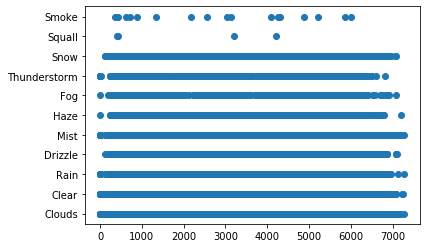

In [81]:
plt.scatter(target, train_df.weather_type);

In [82]:
date_time = categorical.date_time

In [83]:
categorical = categorical.drop(['date_time'], axis = 1)

In [84]:
categorical.head()

,is_holiday,weather_type,weather_description
0,None,Clouds,scattered clouds
1,None,Clouds,broken clouds
2,None,Clouds,overcast clouds
3,None,Clouds,overcast clouds
4,None,Clouds,broken clouds


In [172]:
categorical_ = pd.get_dummies(categorical)

In [173]:
categorical_.head()

,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_None,is_holiday_State Fair,is_holiday_Thanksgiving Day,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
type(train_df.date_time)

pandas.core.series.Series

In [175]:
date_time = pd.to_datetime(data_time)

In [178]:
date_time.shape[0]

48204

In [179]:
d = np.empty((date_time.shape[0], 6))

In [180]:
d[:, 0] = date_time.dt.year
d[:, 1] = date_time.dt.month
d[:, 2] = date_time.dt.day
d[:, 3] = date_time.dt.hour
d[:, 4] = date_time.dt.minute
d[:, 5] = date_time.dt.second

In [181]:
date_df = pd.DataFrame(data = d, columns=['year', 'month', 'data', 'hour', 'minute', 'second'])

In [182]:
date_df.head()

,year,month,data,hour,minute,second
0,2012.0,10.0,2.0,9.0,0.0,0.0
1,2012.0,10.0,2.0,10.0,0.0,0.0
2,2012.0,10.0,2.0,11.0,0.0,0.0
3,2012.0,10.0,2.0,12.0,0.0,0.0
4,2012.0,10.0,2.0,13.0,0.0,0.0


In [183]:
date_df = date_df.drop('minute',axis = 1)

In [184]:
date_df = date_df.drop('second',axis = 1)

In [185]:
date_df.head()

,year,month,data,hour
0,2012.0,10.0,2.0,9.0
1,2012.0,10.0,2.0,10.0
2,2012.0,10.0,2.0,11.0
3,2012.0,10.0,2.0,12.0
4,2012.0,10.0,2.0,13.0


In [189]:
combined = pd.concat([numerical, categorical_], axis=1).values

#### inpute the null values

In [190]:
date_ = date_df.values

In [191]:
X =  np.hstack((combined, date_))

In [192]:
y = target.values

In [193]:
x_train = X[:train_df.shape[0], :]
x_test = X[train_df.shape[0]:, :]

In [194]:
print(x_train.shape, train_df.shape)
print(x_test.shape, test_df.shape)

(33750, 75) (33750, 14)
(14454, 75) (14454, 14)


In [195]:
x_val = x_train[:1000, :]
y_val = y[:1000]
x_train = x_train[1000:, :]
y_train = y[1000:]

## model

- dnn model

In [213]:
import keras.models as model
from keras.layers import Dense

In [214]:
# define model
model = model.Sequential()
model.add(Dense(64, activation='relu', input_shape = (75, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [215]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                4864      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________


In [216]:
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 512, validation_data=(x_val, y_val))

Train on 32750 samples, validate on 1000 samples
Epoch 1/100
32750/32750 [==============================] - 1s 39us/step - loss: 11066147.3387 - acc: 2.1374e-04 - val_loss: 6670540.9120 - val_acc: 0.0000e+00
Epoch 2/100
32750/32750 [==============================] - 0s 11us/step - loss: 4119541.5296 - acc: 1.2214e-04 - val_loss: 4260070.1480 - val_acc: 0.0000e+00
Epoch 3/100
32750/32750 [==============================] - 0s 11us/step - loss: 3944278.1951 - acc: 3.0534e-05 - val_loss: 4268493.9920 - val_acc: 0.0000e+00
Epoch 4/100
32750/32750 [==============================] - 0s 10us/step - loss: 3940958.4840 - acc: 6.1069e-05 - val_loss: 4244747.0760 - val_acc: 0.0000e+00
Epoch 5/100
32750/32750 [==============================] - 0s 11us/step - loss: 3935357.5500 - acc: 2.4427e-04 - val_loss: 4287525.8120 - val_acc: 0.0000e+00
Epoch 6/100
32750/32750 [==============================] - 0s 10us/step - loss: 3932452.7846 - acc: 1.2214e-04 - val_loss: 4241000.1480 - val_acc: 0.0000e+00
Ep

32750/32750 [==============================] - 0s 11us/step - loss: 1022749.6351 - acc: 6.1069e-04 - val_loss: 892262.2135 - val_acc: 1.0000e-03
Epoch 53/100
32750/32750 [==============================] - 0s 9us/step - loss: 1028376.1228 - acc: 5.1908e-04 - val_loss: 1002947.5410 - val_acc: 0.0020
Epoch 54/100
32750/32750 [==============================] - 0s 9us/step - loss: 1021082.5046 - acc: 4.2748e-04 - val_loss: 936619.0090 - val_acc: 1.0000e-03
Epoch 55/100
32750/32750 [==============================] - 0s 8us/step - loss: 1020539.8088 - acc: 6.4122e-04 - val_loss: 917664.5100 - val_acc: 0.0000e+00
Epoch 56/100
32750/32750 [==============================] - 0s 9us/step - loss: 1018110.4994 - acc: 6.7176e-04 - val_loss: 920822.5045 - val_acc: 0.0000e+00
Epoch 57/100
32750/32750 [==============================] - 0s 9us/step - loss: 1014470.9808 - acc: 5.4962e-04 - val_loss: 895312.0575 - val_acc: 1.0000e-03
Epoch 58/100
32750/32750 [==============================] - 0s 9us/step -

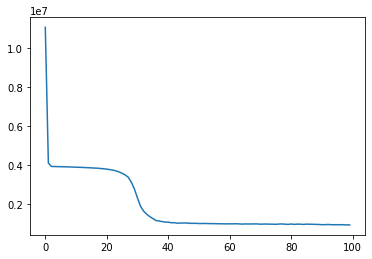

In [217]:
plt.plot(hist.history['loss'])

In [218]:
y_ = model.predict(x_val)

In [219]:
import sklearn.metrics as metrics

In [220]:
metrics.r2_score(y_, y_val)

0.6913691644623678

### linear model

In [231]:
from sklearn.linear_model import Ridge

In [232]:
ridge = Ridge(max_iter=10000)

In [233]:
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [234]:
ridge.score(x_train, y_train)

0.14698147301836817

### gradient boosting

In [275]:
import xgboost as xgb
params = {'eval_metric':'rmse'}
xm = xgb.DMatrix(x_train, label=y_train)
xmodel = xgb.train(params, xm)
xg_y_pred = xmodel.predict(xgb.DMatrix(x_val))

In [276]:
metrics.r2_score(xg_y_pred, y_val)

0.712092597808294

In [277]:
test_pred = xmodel.predict(xgb.DMatrix(x_test))

In [278]:
sample_df

,date_time,traffic_volume
0,1969-05-17 21:00:00,500
1,1969-05-17 21:00:00,530
2,1969-05-17 21:00:00,545
3,1969-05-17 22:00:00,750


In [279]:
sample_df.shape

(4, 2)

In [280]:
submission = pd.DataFrame()

In [281]:
submission

""


In [288]:
submission['data_time'] = test_df.date_time
submission['traffic_volume'] = 

IndexError: too many indices for array

In [283]:
submission.head()

,data_time,traffic_volume
0,2017-05-18 00:00:00,850.313904
1,2017-05-18 00:00:00,850.313904
2,2017-05-18 00:00:00,780.216248
3,2017-05-18 01:00:00,518.369202
4,2017-05-18 01:00:00,518.369202


In [284]:
submission.to_csv('submission.csv', index=None)

In [285]:
test_pred

array([ 850.3139 ,  850.3139 ,  780.21625, ..., 2475.5554 , 1883.6157 ,
       1377.458  ], dtype=float32)